# Capstone Study Region - Colorado

## Jacquelyn Witte

### For the presentation pitch this notebook outlines the study region and data highlights using the NASA Global Landslide Catalog provided by Elsa Culler - CU

In [1]:
import os

import earthpy as et
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from geopandas import GeoDataFrame
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.2, style="whitegrid")

In [2]:
# Change to data directory
data_dir = os.path.join(et.io.HOME,
                        'earth-analytics',
                        'data')
os.chdir(data_dir)

glc_file = os.path.join('capstone', 
                        'landslide', 
                        'nasa_global_landslide_catalog_point.csv')

# glc_file = os.path.join('capstone', 'landslide', 'GLC03122015.csv')
os.path.exists(glc_file)

True

In [3]:
# Read the file
glc = pd.read_csv(glc_file)

glc_co = glc[(glc['country_code'] == 'US') 
             & (glc['admin_division_name'] == 'Colorado') 
             & (glc['landslide_trigger'] != 'freeze_thaw') 
             & (glc['landslide_trigger'] != 'snowfall_snowmelt') 
             & (glc['landslide_trigger'] != 'earthquake') 
             & (glc['landslide_trigger'] != 'leaking_pipe') 
             & (glc['landslide_trigger'] != 'no_apparent_trigger') 
             & (glc['landslide_trigger'] != 'other')              
             & (glc['landslide_trigger'] != 'unknown')
            ]

# covert to datetime
glc_co['date'] = pd.to_datetime(glc_co['event_date'])
glc_co = glc_co.set_index('date').sort_index()
glc_co.shape

(129, 31)

In [4]:
print(glc_co['latitude'].isna().any())
print(glc_co['longitude'].isna().any())

False
False


In [5]:
glc_co['landslide_trigger']

date
2007-08-14 00:00:00        rain
2007-09-06 00:00:00        rain
2007-09-17 00:00:00        rain
2008-04-13 00:00:00        rain
2008-05-28 00:00:00        rain
                         ...   
2018-07-18 22:43:18        rain
2018-07-28 04:00:00    downpour
2018-08-02 23:12:19        rain
2019-07-29 00:00:00    downpour
2020-07-27 12:00:00        rain
Name: landslide_trigger, Length: 129, dtype: object

In [6]:
glc_co_gt2015 = glc_co[glc_co.index > '2015-01-01']

In [7]:
glc_co_gt2015

,OBJECTID,Shape,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,...,event_import_id,latitude,longitude,country_name,country_code,admin_division_name,gazetteer_closest_point,gazetteer_distance,submitted_date,last_edited_date
date,,,,,,,,,,,,,,,,,,,,,
2015-04-27 00:00:00,7986415,"(-106.83929999999998, 40.480200000000025)",Steamboat Today,http://www.steamboattoday.com/news/2015/jun/12...,6994,2015-04-27 00:00:00,NaN,Howelsen Hill,The work will involve repositioning the chairl...,Howelsen Hill,...,6994,40.480200,-106.839300,United States,US,Colorado,Steamboat Springs,1.11,2016-03-24 17:17:49,2022-04-23 06:42:31
2015-05-11 00:00:00,7993881,"(-105.22739999999999, 39.77900000000005)",ABC7,http://www.thedenverchannel.com/news/local-new...,7047,2015-05-11 00:00:00,NaN,"Wyoming Circle, Golden",The soil on North Table Mountain is so saturat...,"Wyoming Circle, Golden",...,7047,39.779000,-105.227400,United States,US,Colorado,Golden,2.78,2015-07-02 14:21:58.000001,2022-04-23 06:23:19
2015-05-13 00:00:00,7979409,"(-104.83649999999994, 38.921800000000076)",KKTV 11,http://www.kktv.com/home/headlines/Homeowners-...,7060,2015-05-13 00:00:00,NaN,"6250 Fencerail Hts Colorado Springs, CO",The almost nonstop rain last week and over the...,"6250 Fencerail Hts Colorado Springs, CO",...,7060,38.921800,-104.836500,United States,US,Colorado,Usaf Academy Airstrip,5.73,2015-07-02 18:54:11,2022-04-23 06:37:53
2015-05-19 00:00:00,7968089,"(-105.27059999999994, 38.296700000000044)",Wet Mountain Tribune,http://www.wetmountaintribune.com/home.asp?i=8...,7051,2015-05-19 00:00:00,NaN,"Mile Marker 10, Oak Creek Grade Road",A severe mudslide closed Oak Creek Grade on Tu...,"Mile Marker 10, Oak Creek Grade Road",...,7051,38.296700,-105.270600,United States,US,Colorado,Wetmore,9.17,2015-07-02 16:06:25,2022-04-23 06:30:16
2015-05-19 00:00:00,7993793,"(-105.09479999999996, 38.55260000000004)",Fox 21 News,http://fox21news.com/2015/05/21/rock-slide-and...,7053,2015-05-19 00:00:00,NaN,Phantom Canyon Road,“Our road crews went further up Phantom Canyon...,Phantom Canyon Road,...,7053,38.552600,-105.094800,United States,US,Colorado,Fremont County,13.55,2015-07-02 16:23:04,2022-04-23 06:23:19
2015-05-19 00:00:00,7971286,"(-105.09729999999996, 38.55140000000006)",Fox 21 News,http://fox21news.com/2015/05/21/rock-slide-and...,7052,2015-05-19 00:00:00,NaN,Phantom Canyon Road,“Our road crews went further up Phantom Canyon...,Phantom Canyon Road,...,7052,38.551400,-105.097300,United States,US,Colorado,Fremont County,13.40,2015-07-02 16:21:32,2022-04-23 06:32:24
2015-05-21 00:00:00,7968172,"(-104.84659999999997, 38.832700000000045)",KKTV 11 News,http://www.kktv.com/home/headlines/Saturated-G...,7048,2015-05-21 00:00:00,NaN,A-1 Mobile Park,According to the Colorado Springs Fire Departm...,A-1 Mobile Park,...,7048,38.832700,-104.846600,United States,US,Colorado,Colorado Springs,3.05,2015-07-02 15:14:24,2022-04-23 06:30:16
2015-06-19 00:00:00,7965376,"(-104.85739999999998, 38.77140000000003)",FOX 21 News,http://fox21news.com/2015/06/19/landslide-forc...,6940,2015-06-19 00:00:00,NaN,"Conservation building, Cheyenne Mountain Zoo, ...",The wet weather has been causing some serious ...,"Conservation building, Cheyenne Mountain Zoo, ...",...,6940,38.771400,-104.857400,United States,US,Colorado,Fort Carson,8.14,2015-06-24 20:42:17,2022-04-23 06:28:10.000001
2015-07-04 00:00:00,7969119,"(-104.85379999999998, 38.81170000000003)",FOX21,http://fox21news.com/2015/08/17/wet-weekend-we...,7340,2015-07-04 00:00:00,NaN,"Constellation Drive, COLORADO SPRINGS, Colo",A landslide in the neighborhood continued to g...,"Constellation Drive, COLORADO SPRINGS, Colo",...,7340,38.811700,-104.853800,United States,US,Colorado,Colorado Springs,4.90,2016-05-10 14:26:44,2022-04-23 06:30:59


large 2
medium 21
small 16


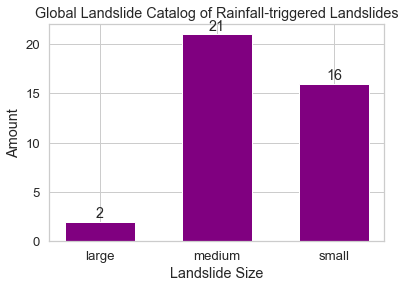

In [8]:
glc_co_gt2015.columns
#glc_co[['landslide_size', 'injury_count']]

stack_plot = []
labels = []
for i, data in glc_co_gt2015.groupby('landslide_size'):
    labels.append(i)
    stack_plot.append(data['landslide_size'].count())
    print(i, data['landslide_size'].count())

labels, stack_plot

f, ax = plt.subplots()
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='purple')
ax.set(xlabel='Landslide Size',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides')

ax.bar_label(bars, padding=1);

continuous_rain 10
downpour 17
rain 12


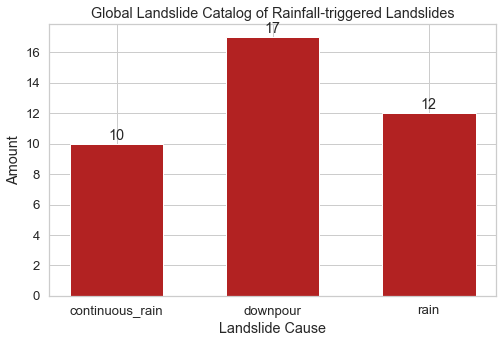

In [9]:
stack_plot = []
labels = []
for i, data in glc_co_gt2015.groupby('landslide_trigger'):
    labels.append(i)
    stack_plot.append(data['landslide_trigger'].count())
    print(i, data['landslide_trigger'].count())

labels, stack_plot

f, ax = plt.subplots(figsize=(8,5))
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='firebrick')
ax.set(xlabel='Landslide Cause',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides')

ax.bar_label(bars, padding=1);

continuous_rain 10
downpour 17
rain 12


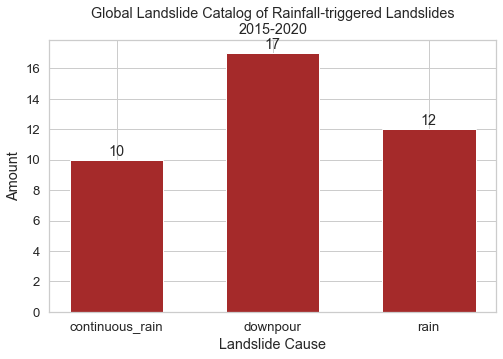

In [10]:
stack_plot = []
labels = []
for i, data in glc_co_gt2015.groupby('landslide_trigger'):
    labels.append(i)
    stack_plot.append(data['landslide_trigger'].count())
    print(i, data['landslide_trigger'].count())

labels, stack_plot

f, ax = plt.subplots(figsize=(8,5))
width = 0.6
bars = ax.bar(labels, stack_plot, width, color='brown')
ax.set(xlabel='Landslide Cause',
       ylabel='Amount',
       title='Global Landslide Catalog of Rainfall-triggered Landslides\n2015-2020')

ax.bar_label(bars, padding=1);

### Map the landslides over Colorado

In [11]:
geometry = [Point(xy) for xy in zip(
    glc_co_gt2015['longitude'], glc_co_gt2015['latitude'])]
crs = 'epsg:4326'
glc_co_epsg4326 = GeoDataFrame(glc_co_gt2015, crs=crs, geometry=geometry)

In [12]:
glc_co_epsg4326.index.min(), glc_co_epsg4326.index.max()

(Timestamp('2015-04-27 00:00:00'), Timestamp('2020-07-27 12:00:00'))

In [13]:
triggers = np.unique(glc_co_epsg4326['landslide_trigger'])
triggers

array(['continuous_rain', 'downpour', 'rain'], dtype=object)

In [14]:
# Create a symbology dictionary that maps "type" to color. 
colors = ['red', 'green', 'blue', 'orange','lightgray']
points_symb = dict(zip(triggers,colors))
points_symb

{'continuous_rain': 'red', 'downpour': 'green', 'rain': 'blue'}

In [15]:
m2 = folium.Map([39.0, -105.27], zoom_start=6, tiles='Stamen Terrain')

for i, loc in glc_co_epsg4326.iterrows():
    # print(i, loc['latitude'], loc['longitude'])
    folium.Marker(location=[loc['latitude'], loc['longitude']],
                  icon=folium.Icon(color=points_symb[loc['landslide_trigger']],
                                   prefix='glyphicon', icon='off')).add_to(m2)

# Continuous Rain
folium.CircleMarker(location=[40.5, -103], radius=10,
                    color='red',
                    fill_color='red',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[40.5, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Continuous Rain'}</b>""")
).add_to(m2)

# Downpour
folium.CircleMarker(location=[40, -103], radius=10,
                    color='green',
                    fill_color='green',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[40, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Downpour'}</b>""")
).add_to(m2)

# Rain
folium.CircleMarker(location=[39.5, -103], radius=10,
                    color='dodgerblue',
                    fill_color='dodgerblue',
                    fill_opacity=1.0).add_to(m2)
folium.Marker(
    location=[39.5, -102.7],
    icon=folium.DivIcon(
        html=f"""<b>{'Rain'}</b>""")
).add_to(m2)

       
#Add Title
title_html = 'Rainfall-triggered landslides in Colorado (2015-2020)'
m2.get_root().html.add_child(folium.Element(title_html))

m2

In [16]:
map_output = os.path.join(et.io.HOME,
                           'earth-analytics',
                           'capstone-landslides-soilmoisture', 'plots',
                           'map_landslides_sites.html')
m2.save(map_output)